<a href="https://colab.research.google.com/github/kumarabhinavthakur274/Kumar_Abhinav_Rossmann_Sales_Prediction_Capstone_Project/blob/main/Kumar_Abhinav_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Importing some of the important libraries**

In [ ]:
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math

# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})



# **Data Preparation**

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# uploading relevent datasets 
df_sales = pd.read_csv("/content/drive/MyDrive/DriveHub/Rossmann Stores Data (1).csv")
df_stores = pd.read_csv("/content/drive/MyDrive/DriveHub/store.csv")

In [ ]:
# lets check the data frames
print("Rossman sales dataset: \n")
df_sales.head()

Rossman sales dataset: 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
print("Stores dataset: \n")
df_stores.head()

Stores dataset: 



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Looks like there is no null value in sales data set.

In [ ]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are missing values in stores dataset lets check how many null vaues each columns have.

In [ ]:
print("Total Number of null values in each columns of stores dataset \n")
df_stores.isnull().sum()

Total Number of null values in each columns of stores dataset 



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
promo_list = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for i in promo_list:
  df_stores[i].fillna(value=0,inplace=True)

In [ ]:
comp_list = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
for j in comp_list:
  df_stores[j].fillna(df_stores[i].mode()[0],inplace=True)

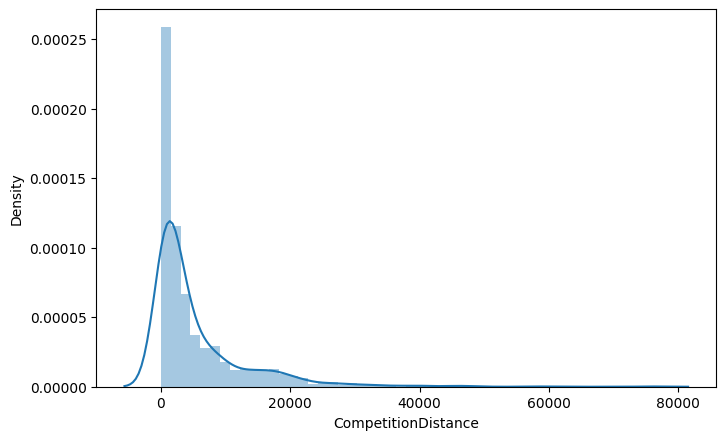

In [ ]:
sns.distplot(df_stores["CompetitionDistance"])

In [ ]:
df_stores["CompetitionDistance"].fillna(df_stores["CompetitionDistance"].median(),inplace=True)

In [ ]:
df_stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
df_merged = pd.merge(df_sales,df_stores,how="left",on="Store")

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
df_merged.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [ ]:
print(df_merged.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
categorical_variable_list = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
for i in categorical_variable_list:
  print(f'Unique vaue in {i} column is {df_merged[i].unique()} ')
  print("\n")


Unique vaue in DayOfWeek column is [5 4 3 2 1 7 6] 


Unique vaue in Open column is [1 0] 


Unique vaue in Promo column is [1 0] 


Unique vaue in StateHoliday column is ['0' 'a' 'b' 'c' 0] 


Unique vaue in SchoolHoliday column is [1 0] 


Unique vaue in StoreType column is ['c' 'a' 'd' 'b'] 


Unique vaue in Assortment column is ['a' 'c' 'b'] 


Unique vaue in CompetitionOpenSinceMonth column is [ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.] 


Unique vaue in CompetitionOpenSinceYear column is [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 


Unique vaue in Promo2 column is [0 1] 


Unique vaue in Promo2SinceWeek column is [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 


Unique vaue in Promo2SinceYear column is [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] 


Unique vaue in PromoInterval column is [0 'Jan,Apr,Jul,Oct'

In [ ]:
# if the store is closed there is no sales possible so we can eliminate those rows
df_merged = df_merged[df_merged.Open == 1]
# now since open column consists of only 1 we can elimate that column
df_merged.drop("Open",axis=1, inplace= True)

In [ ]:
# we can also drop rows with zero sales if there are less instances of such condition
df_merged["Store"][df_merged["Sales"]==0].sum()

31460

In [ ]:
# lets check for percentage of zero sales instances if it is less than 8% it can be dropped
round((df_merged["Store"][df_merged["Sales"]==0].sum()/df_merged["Store"].sum()*100) ,4)


0.0067

In [ ]:
# lets drop rows with zero sales
df_merged = df_merged[df_merged.Sales!=0]

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  float64
 12  CompetitionOpenSinceYear   844338 non-null  float64
 13  Promo2                     8

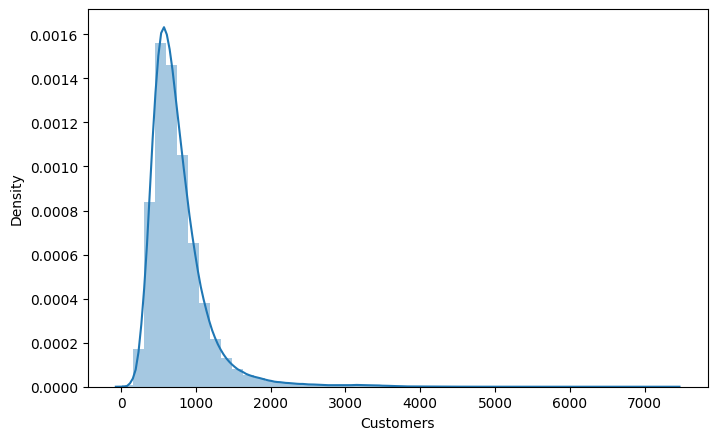

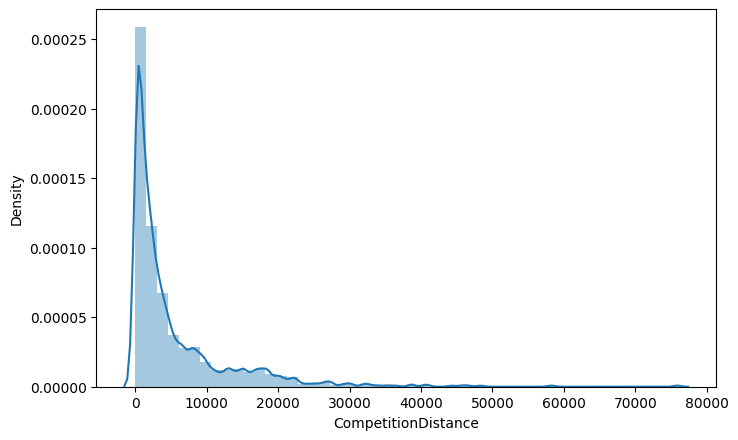

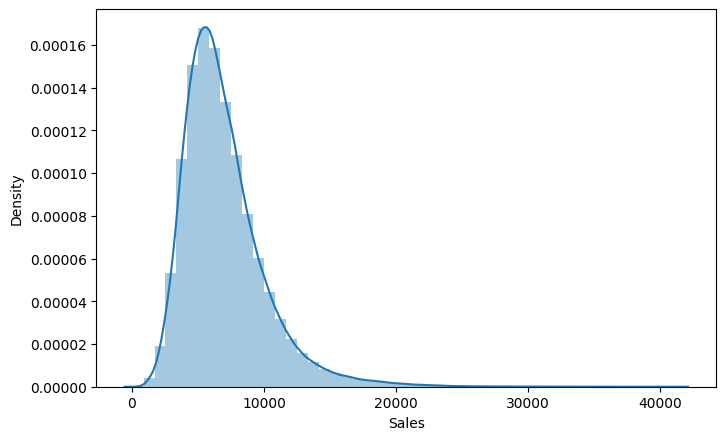

In [ ]:
continuous_variable_list = ["Customers","CompetitionDistance","Sales"]
for i in continuous_variable_list:
  sns.distplot(df_merged[i])
  plt.show()

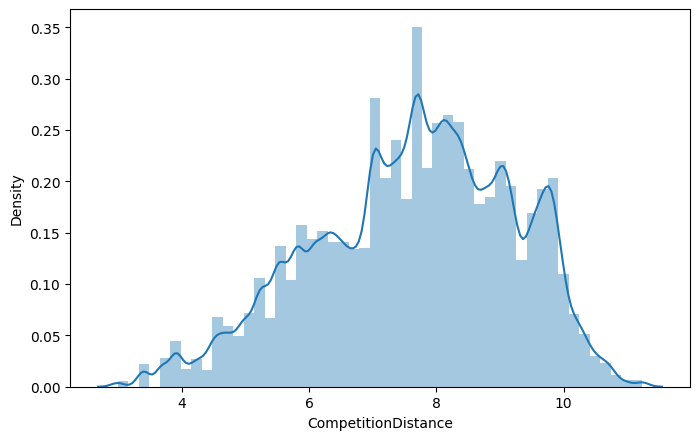

In [ ]:
sns.distplot(np.log(df_merged["CompetitionDistance"]))

In [ ]:
df_merged["log_CompetitionDistance"] = np.log(df_merged["CompetitionDistance"])

In [ ]:
categorical_variable_list = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

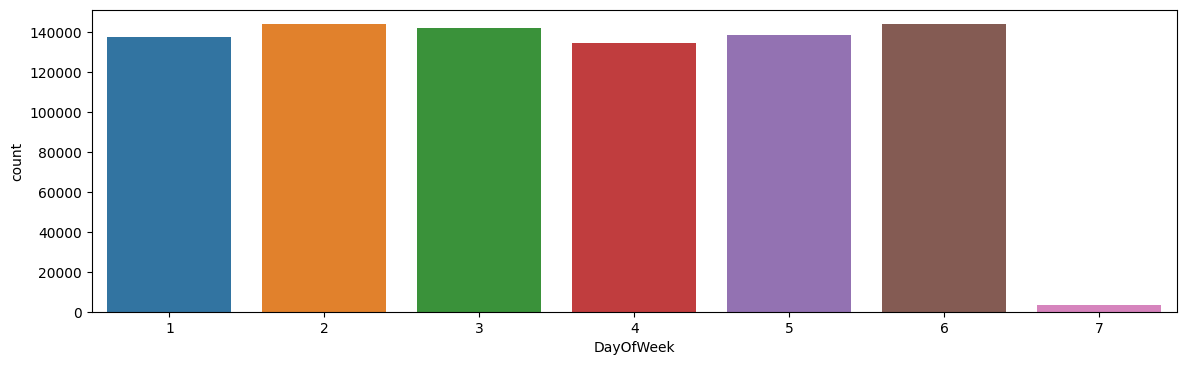

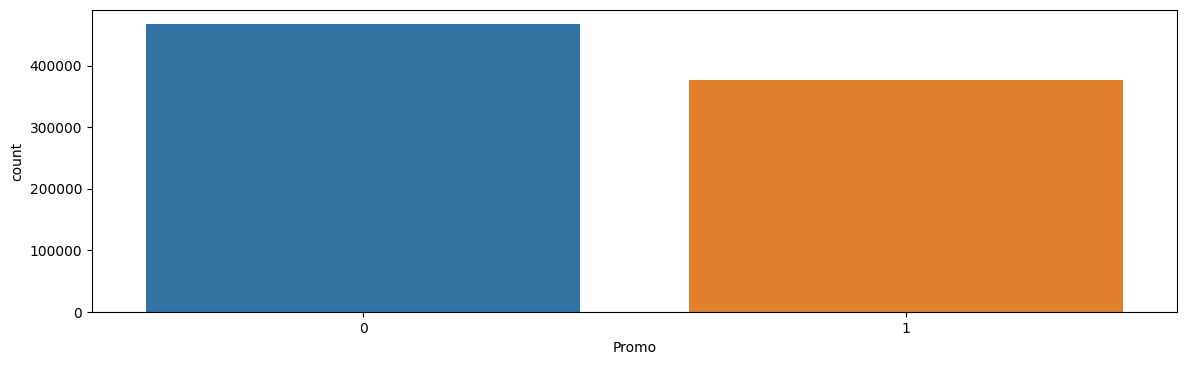

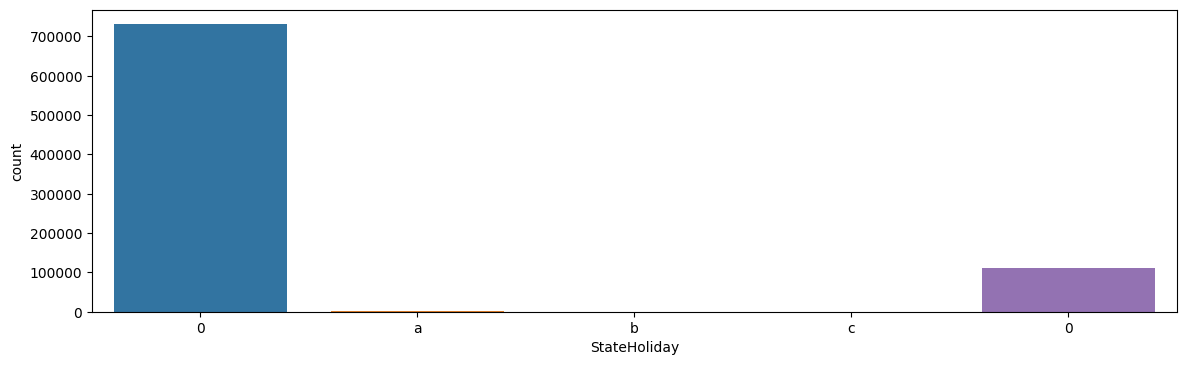

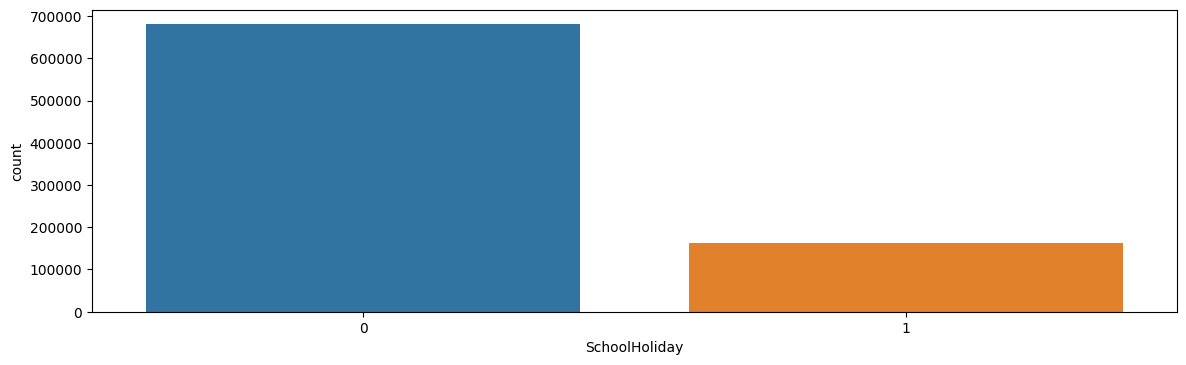

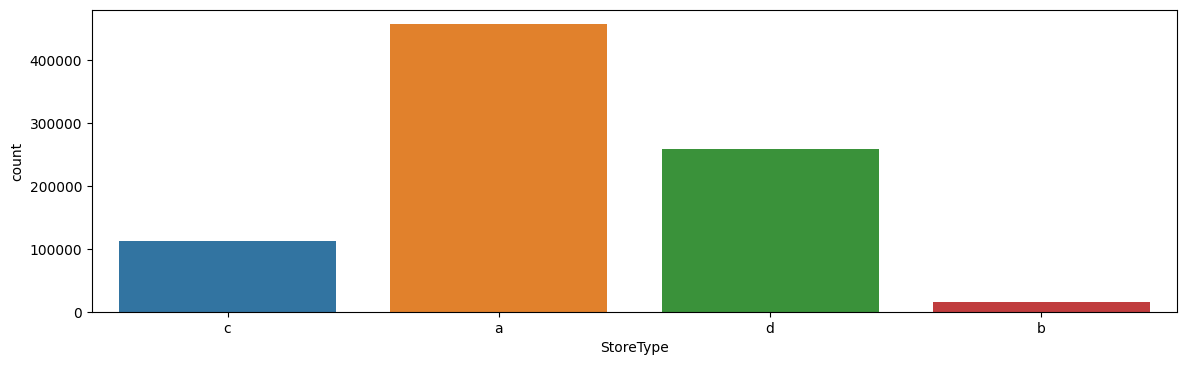

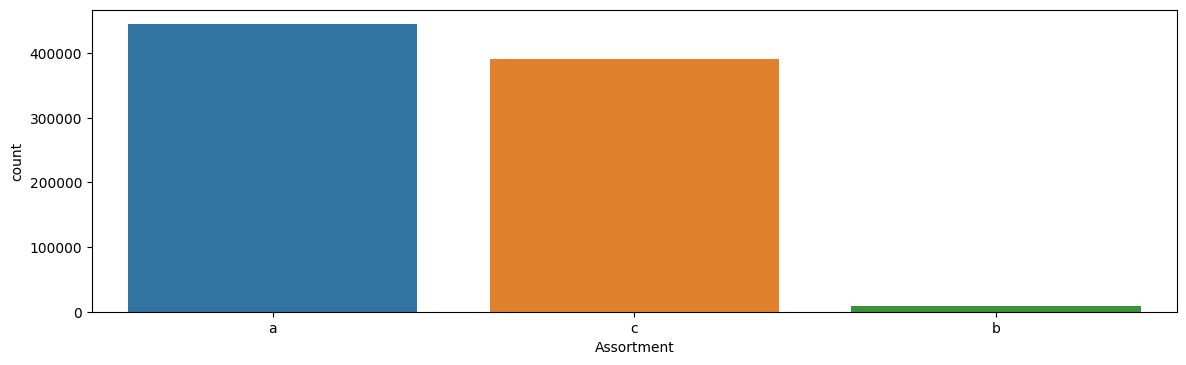

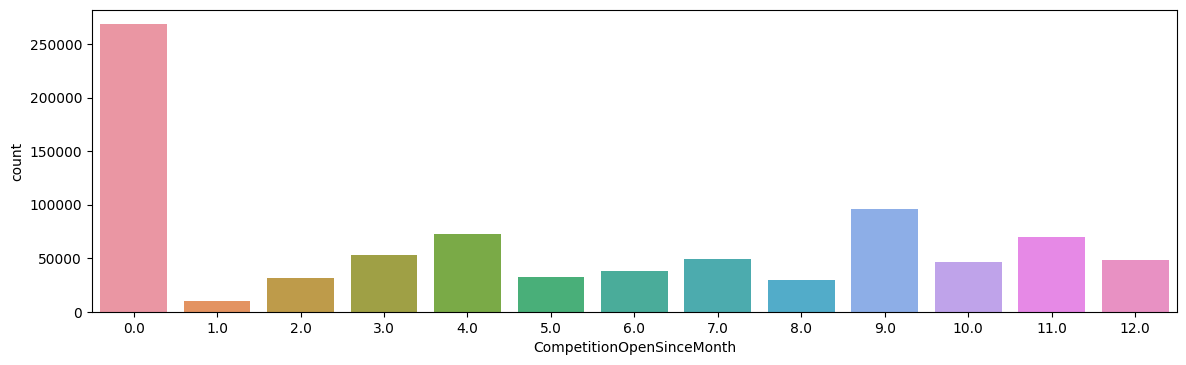

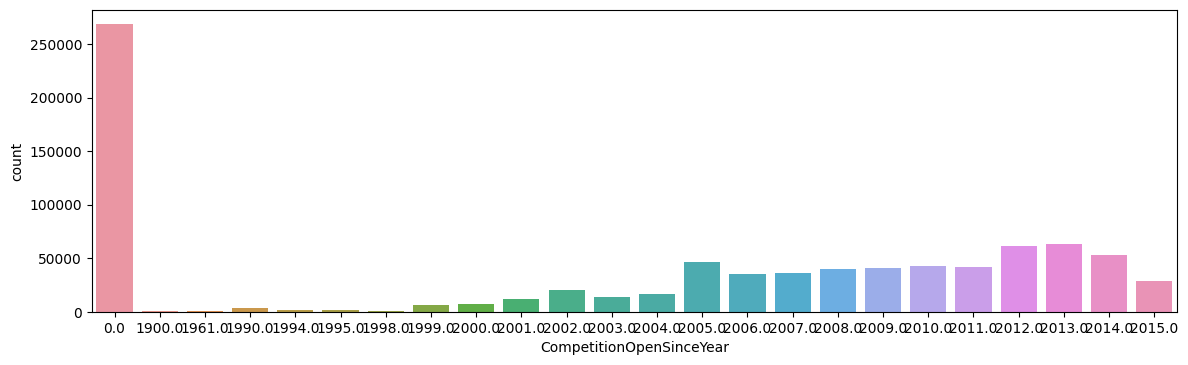

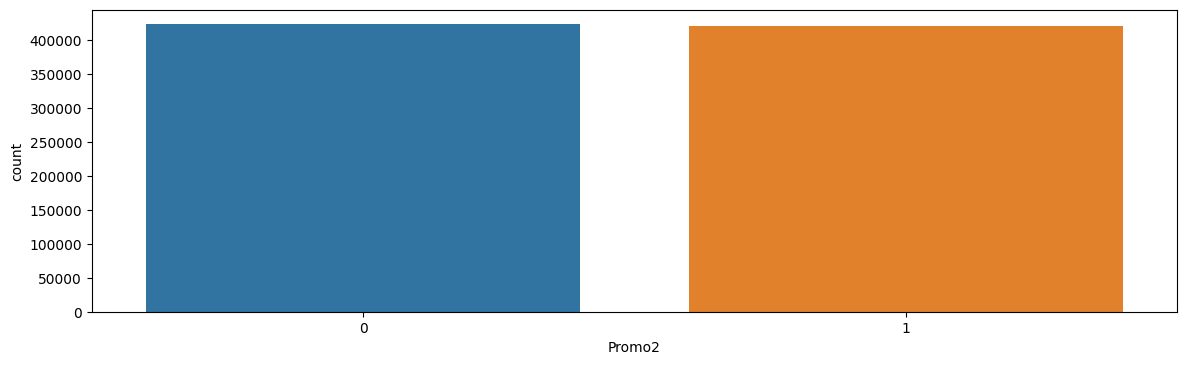

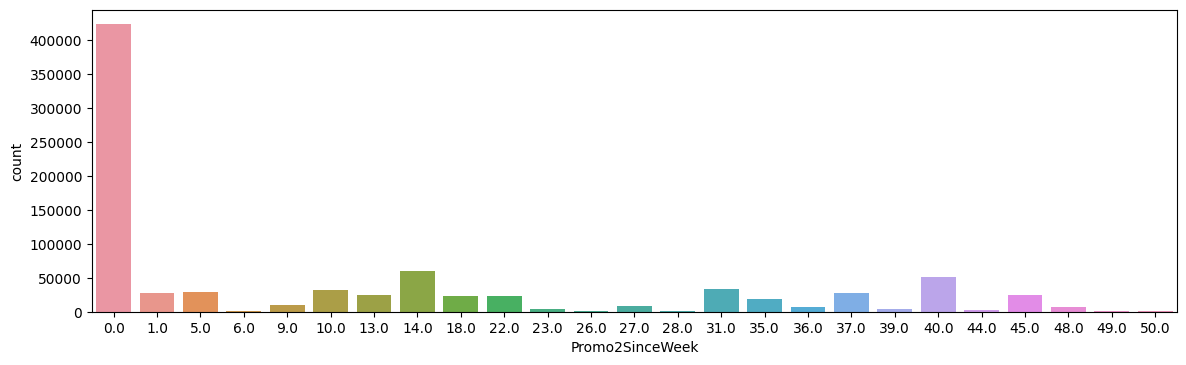

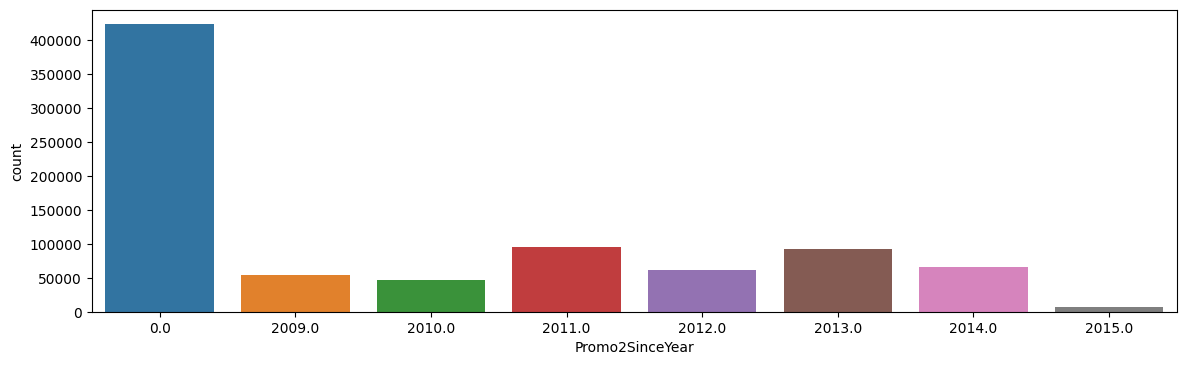

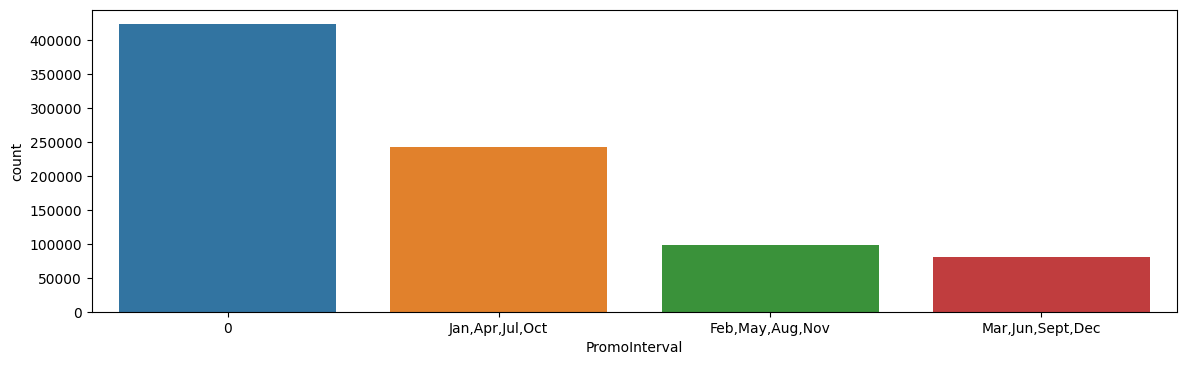

In [ ]:
# cat_df = df_merged[categorical_variable_list]
for i in categorical_variable_list:
  plt.figure(figsize=(14,4))
  sns.countplot(x = i, data = df_merged)

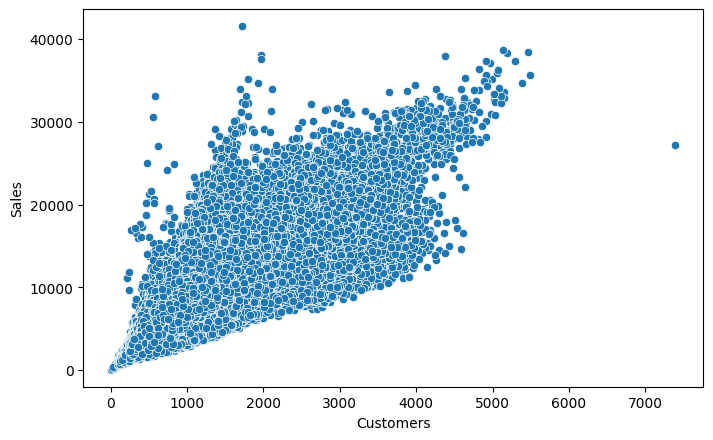

In [ ]:
sns.scatterplot(x=df_merged['Customers'], y=df_merged['Sales'])

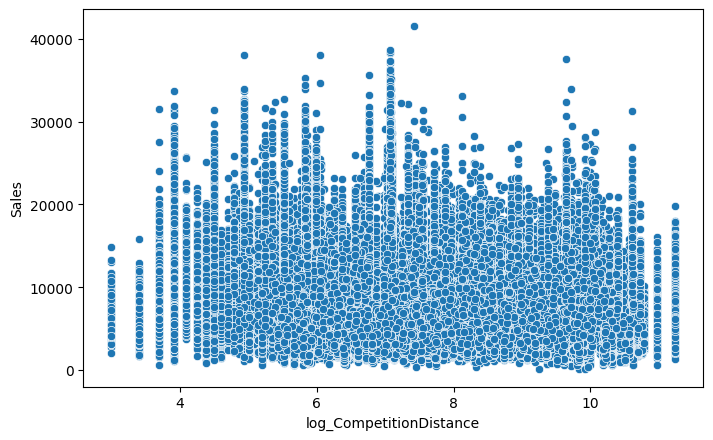

In [ ]:
sns.scatterplot(x=df_merged['log_CompetitionDistance'], y=df_merged['Sales'])


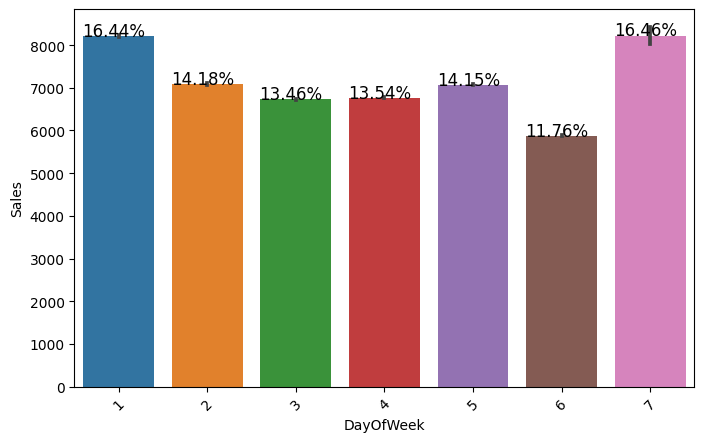

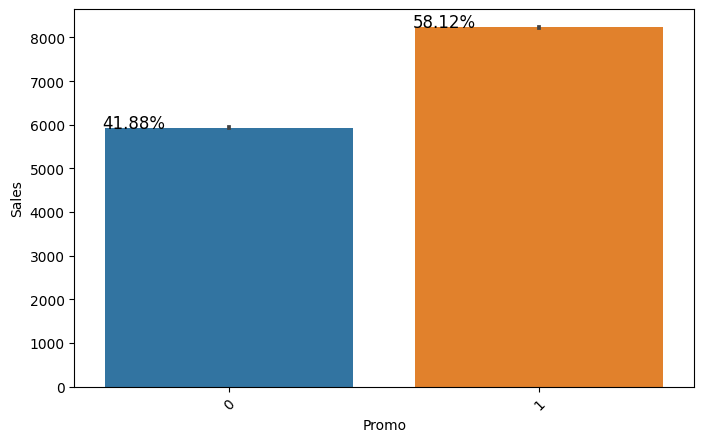

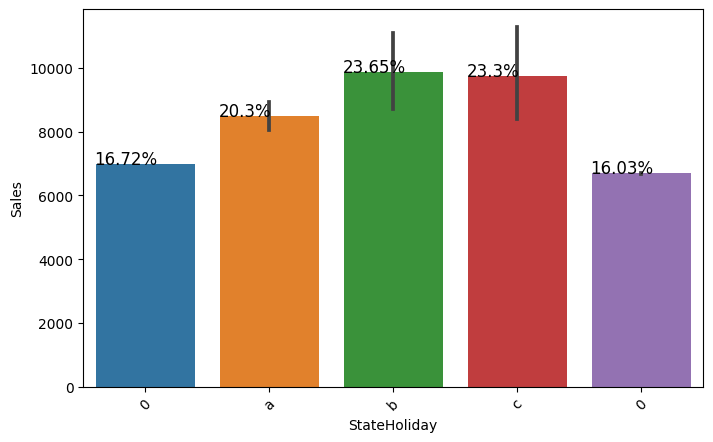

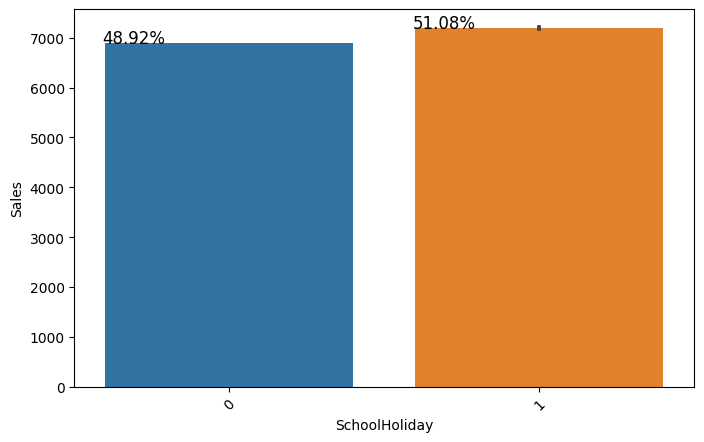

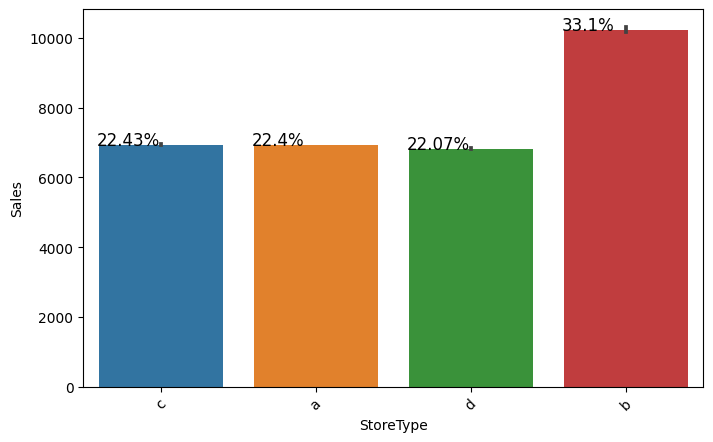

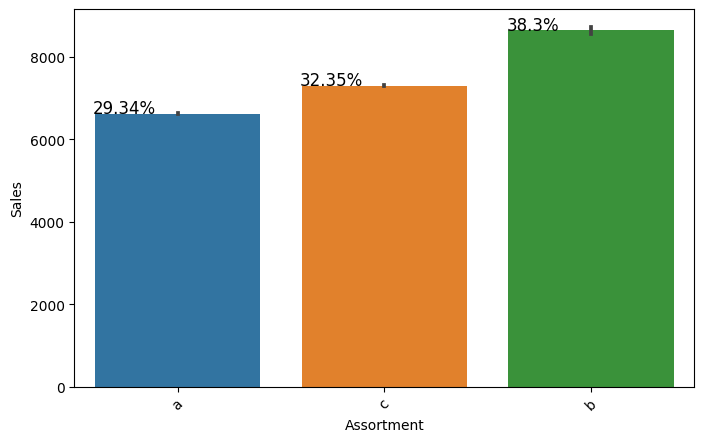

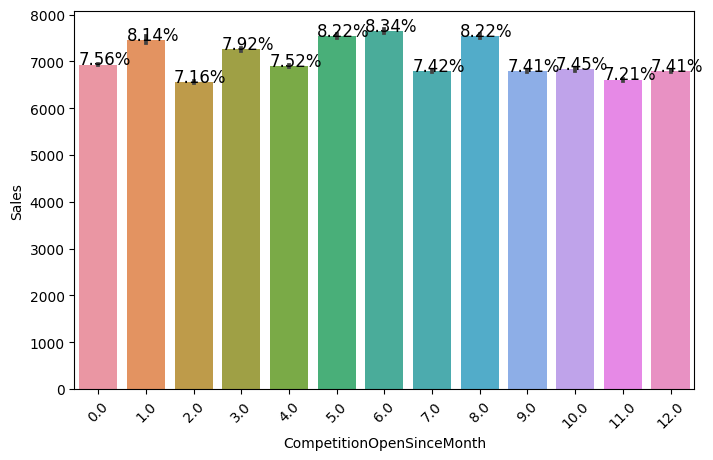

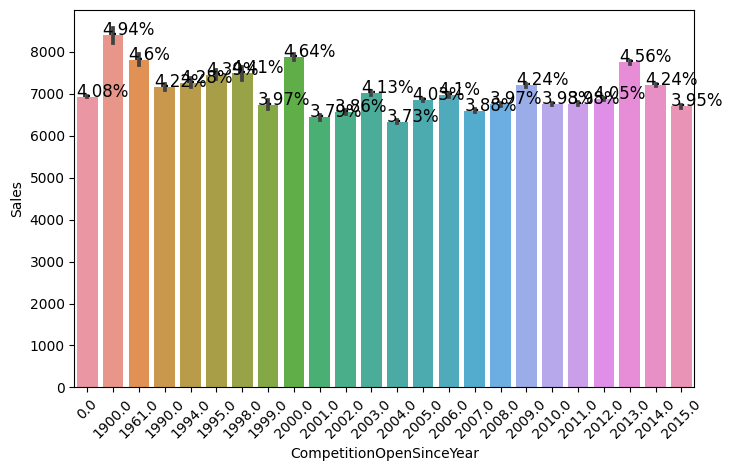

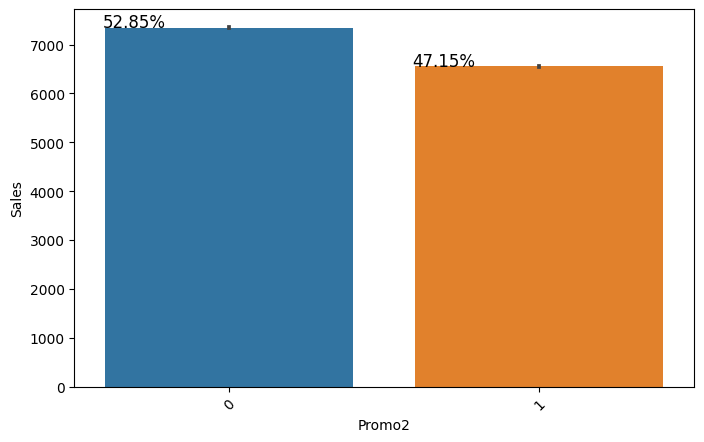

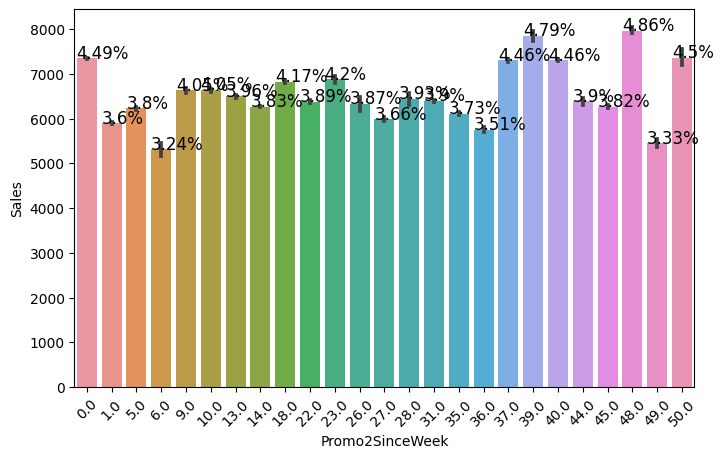

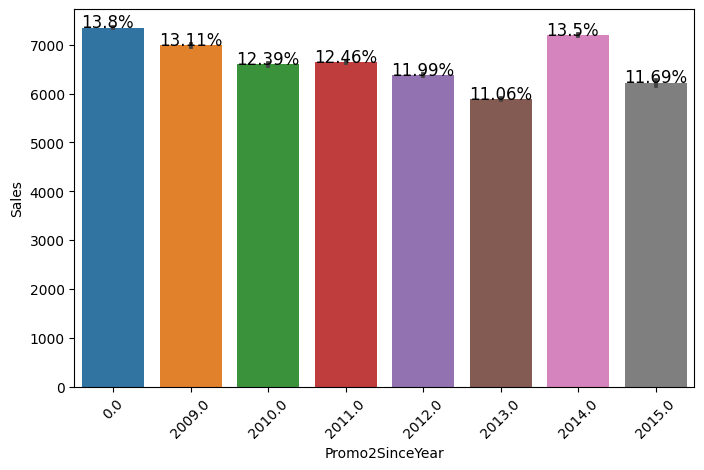

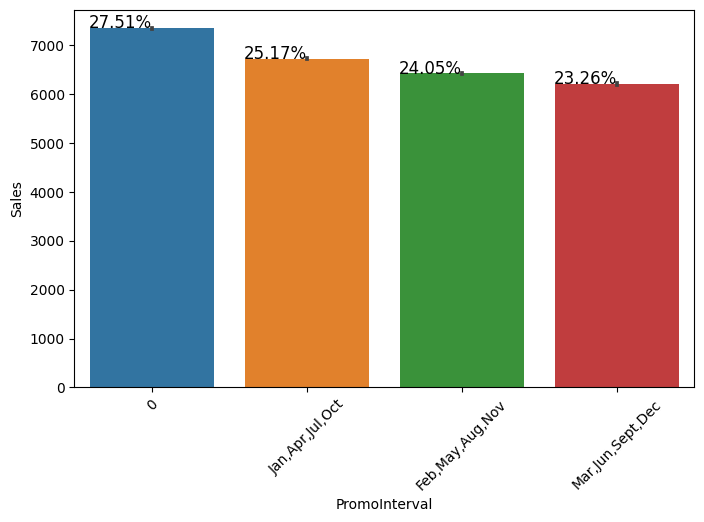

In [ ]:
for value in categorical_variable_list:
  ax = sns.barplot(x=df_merged[value], y=df_merged['Sales']) 
  plt.xticks(rotation=45)
  totals = []
  for i in ax.patches: 
      totals.append(i.get_height()) 

  total = sum(totals) 

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12) 
  plt.show()

**Feature Engineering**

In [ ]:
df_merged["StateHoliday"] = df_merged["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,log_CompetitionDistance
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7.146772
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6.345636
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9.556055
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,6.429719
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,10.305948


**Extract Date month and year**

In [ ]:
def extract_year(x):
    return int(str(x)[:4])

def extract_month(x):
    return int(str(x)[5:7])

def extract_month_year(x):
    return (str(x)[:7])

In [ ]:
df_merged['Date'] = df_merged['Date'].apply(extract_month_year)
df_sales['Date'] = df_sales['Date'].apply(extract_month_year)
df_merged['Year']  = df_merged['Date'].apply(extract_year)
df_merged['Month'] = df_merged['Date'].apply(extract_month)
df_sales['Year']  = df_sales['Date'].apply(extract_year)
df_sales['Month'] = df_sales['Date'].apply(extract_month)

**monthly sales**

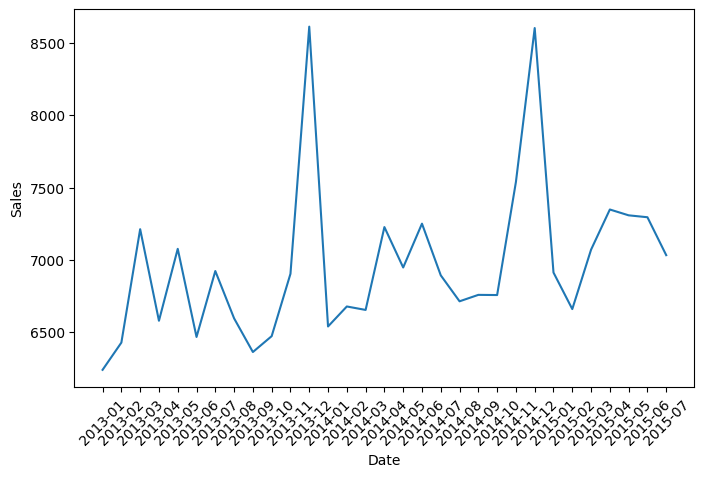

In [ ]:
sns.lineplot(data=df_merged.groupby('Date')['Sales'].mean().reset_index(), x='Date', y='Sales')
plt.xticks(rotation= 45)
plt.show()


In [ ]:
df_merged.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,log_CompetitionDistance,Year,Month
0,1,5,2015-07,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7.146772,2015,7


In [ ]:
df_merged = pd.get_dummies(df_merged,columns=['StoreType','Assortment','Year'])


In [ ]:
df_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'log_CompetitionDistance', 'Month', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015'],
      dtype='object')

In [ ]:
import statsmodels.api as sm

In [ ]:
y = df_merged["Sales"]
x1 = df_merged[['DayOfWeek','log_CompetitionDistance','Customers','StateHoliday', 'SchoolHoliday','Promo','Promo2','StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear']]

In [ ]:
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 2.375e+05
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:33:49   Log-Likelihood:            -7.2260e+06
No. Observations:              844338   AIC:                         1.445e+07
Df Residuals:                  844319   BIC:                         1.445e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1886.7862      6.219   -303.370      0.000   -1898.976   -1874.596
DayOfWeek                   -37.7885      0.842    -44.877      0.000     -39.439     -36.138
log_CompetitionDistance     253.6199      0.972    260.917      0.000     251.715     255.525
Customers                     7.5981      0.004   1779.484      0.000       7.590       7.607
StateHoliday                239.7362     42.104      5.694      0.000     157.214     322.259
SchoolHoliday                65.9344      3.511     18.782      0.000      59.054      72.815
Promo                      1105.2502      2.944    375.412      0.000    1099.480    1111.021
Promo2                     1.038e+05   2444.205     42.456      0.000     9.9e+04    1.09e+05
StoreType_a                 156.0397      4.428     35.240      0.000     147.361     164.718
StoreType_b               -3184.3152     11.946   -266.553      0.000   -3207.729   -3160.901
StoreType_c                  -5.9450      5.050     -1.177      0.239     -15.843       3.953
StoreType_d                1147.4343      4.958    231.420      0.000    1137.716    1157.152
Assortment_a                677.4212      6.370    106.339      0.000     664.936     689.907
Assortment_b              -3522.9415     14.445   -243.888      0.000   -3551.253   -3494.630
Assortment_c                958.7341      6.597    145.324      0.000     945.804     971.664
Year_2013                  -757.5527      2.783   -272.241      0.000    -763.007    -752.099
Year_2014                  -655.1236      2.817   -232.597      0.000    -660.644    -649.603
Year_2015                  -474.1099      3.033   -156.318      0.000    -480.054    -468.165
CompetitionOpenSinceMonth    -3.4001      0.519     -6.554      0.000      -4.417      -2.383
CompetitionOpenSinceYear      0.0563      0.002     23.552      0.000       0.052       0.061
Promo2SinceWeek               6.6842      0.143     46.735      0.000       6.404       6.965
Promo2SinceYear             -51.4753      1.215    -42.382      0.000     -53.856     -49.095
==============================================================================
Omnibus:                   206380.390   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2329242.813
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                      10.955   Cond. No.                     1.02e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(x_train, y_train)

In [ ]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
y_predicted = linreg.predict(x_train)
y_test_predicted = linreg.predict(x_test)

print("Regresion Model Score" , ":" , linreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(x_test, y_test))
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8352723629182524 , Out of Sample Test Score : 0.8346442293429678
Training RMSE : 1260.3127969589736 Testing RMSE : 1260.7679138586882
Training MAPE : 13.874579946828375 Testing MAPE : 13.942395080378745


# **LASSO**

In [ ]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(x_train, y_train)
print("Regresion Model Score" , ":" , lasreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(x_test, y_test))

yd_predicted = lasreg.predict(x_train)
yd_test_predicted = lasreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8349073963098526 , Out of Sample Test Score : 0.834292656192247
Training RMSE : 1260.3127969589736 Testing RMSE : 1260.7679138586882
Training MAPE : 13.874579946828375 Testing MAPE : 13.942395080378745


# **Ridge**

In [ ]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(x_train, y_train)
# validation
print("Regresion Model Score" , ":" , rdgreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(x_test, y_test))

yd_predicted = rdgreg.predict(x_train)
yd_test_predicted = rdgreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8352722890531459 , Out of Sample Test Score : 0.8346440089307446
Training RMSE : 1260.3127969589736 Testing RMSE : 1260.7679138586882
Training MAPE : 13.874579946828375 Testing MAPE : 13.942395080378745


# **Decision Tree**

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# tree = DecisionTreeRegressor(min_samples_leaf=20)
# treereg = tree.fit(xl_train, yl_train)
# print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
#       "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

# yl_predicted = treereg.predict(xl_train)
# yl_test_predicted = treereg.predict(xl_test)
# print("Training RMSE", ":", rmse(yl_train, yl_predicted),
#       "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
# print("Training MAPE", ":", mape(yl_train, yl_predicted),
#       "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

# **Random Forest**

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rdf = RandomForestRegressor(n_estimators=30)
# rdfreg = rdf.fit(x_train, y_train)
# print("Regresion Model Score" , ":" , rdfreg.score(x_train, y_train) , "," ,
#       "Out of Sample Test Score" ,":" , rdfreg.score(x_test, y_test))   

# y_predicted = rdfreg.predict(x_train)
# y_test_predicted = rdfreg.predict(x_test)

# print("Training RMSE", ":", rmse(y_train, y_predicted),
#       "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#       "Testing MAPE", ":", mape(y_test, y_test_predicted))

In [ ]:
# features = x_train.columns
# importances = rdfreg.feature_importances_
# indices = np.argsort(importances)
# plt.figure(figsize=(8,10))
# plt.title('Feature Importances', fontsize=20)
# plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')